### RAPTOR: Recursive Abstractive Processing for Tree-Organized Retrieval

The [RAPTOR](https://arxiv.org/pdf/2401.18059.pdf) paper presents an interesting approaching for indexing and retrieval of documents:

* The `leafs` are a set of starting documents
* Leafs are embedded and clustered
* Clusters are then summarized into higher level (more abstract) consolidations of information across similar documents

This process is done recursivly, resulting in a "tree" going from raw docs (`leafs`) to more abstract summaries.
 
We can applying this at varying scales; `leafs` can be:

* Text chunks from a single doc (as shown in the paper)
* Full docs (as we show below)

With longer context LLMs, it's possible to perform this over full documents. 

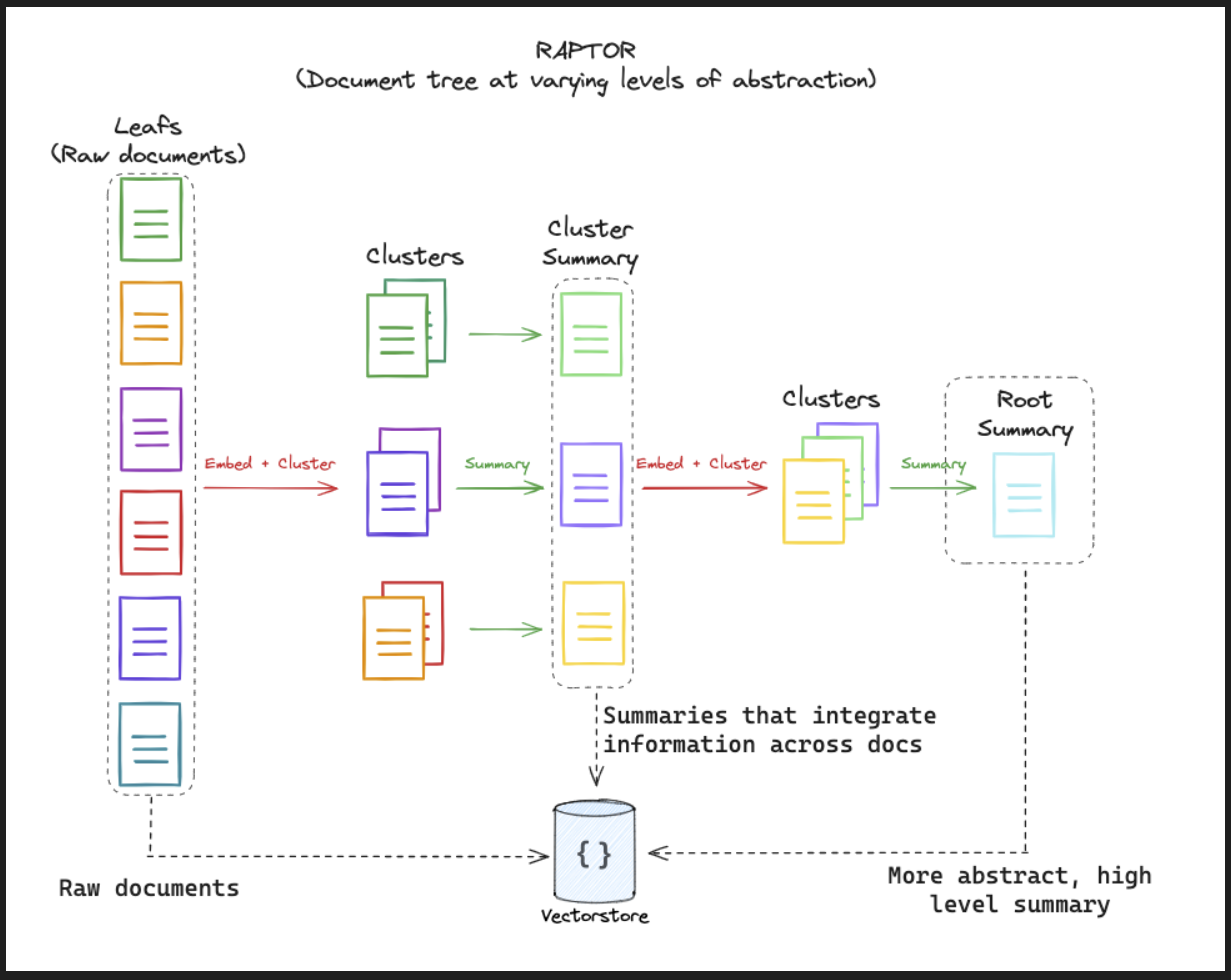

Etapes pour reproduire ce NB:
1. Cloner https://github.com/parthsarthi03/raptor.git
2. Créer un environnement conda
3. Faire cd raptor et pip install -r requirements.txt
4. Installer les modules additionnels pour ce notebook:
* !pip install pandas langchain langchain_openai

In [26]:
# NOTE: An OpenAI API key must be set here for application initialization, even if not in use.
# If you're not utilizing OpenAI models, assign a placeholder string (e.g., "not_used").
import os
# os.environ["OPENAI_API_KEY"] = "your-openai-key"
import dotenv
dotenv.load_dotenv("/home/chougar/Documents/GitHub/Formation_datascientest/DL-NLP/.env")

True

In [27]:
from langchain.document_loaders import PyPDFLoader

# Load the PDF
pdf_file_path = './PROJECT DOCUMENT MAHAKAM 2023-2025_balise.pdf'
loader = PyPDFLoader(pdf_file_path)
pages = loader.load()

# nettoyage
bruits=["Planète Urgence | FOREST Programme"]
for doc in pages:
    for bruit in bruits:
        if bruit in doc.page_content:
            doc.page_content=doc.page_content.replace(bruit, "")
# del empty docs
pages = [doc for doc in pages if len(doc.page_content)>0]
full_text=""
for p in pages:
    full_text+= p.page_content
len(full_text)

98615

1) **Building**: RAPTOR recursively embeds, clusters, and summarizes chunks of text to construct a tree with varying levels of summarization from the bottom up. You can create a tree from the text in 'sample.txt' using `RA.add_documents(text)`.

2) **Querying**: At inference time, the RAPTOR model retrieves information from this tree, integrating data across lengthy documents at different abstraction levels. You can perform queries on the tree with `RA.answer_question`.

In [28]:
# en cas d'erreur lié à HF, lancer ce code:
# !pip uninstall sentence-transformers huggingface_hub -y
# !pip install sentence-transformers>=2.3.0 huggingface_hub>=0.12.0
# !pip install --upgrade openai httpx

### Building the tree

In [29]:

from raptor import RetrievalAugmentation 

RA = RetrievalAugmentation()

# construct the tree
RA.add_documents(full_text)

2025-03-16 13:32:02,922 - Successfully initialized TreeBuilder with Config 
        TreeBuilderConfig:
            Tokenizer: <Encoding 'cl100k_base'>
            Max Tokens: 100
            Num Layers: 5
            Threshold: 0.5
            Top K: 5
            Selection Mode: top_k
            Summarization Length: 100
            Summarization Model: <raptor.SummarizationModels.GPT4SummarizationModel object at 0x7f40f874f350>
            Embedding Models: {'OpenAI': <raptor.EmbeddingModels.OpenAIEmbeddingModel object at 0x7f40f874f150>}
            Cluster Embedding Model: OpenAI
        
        Reduction Dimension: 10
        Clustering Algorithm: RAPTOR_Clustering
        Clustering Parameters: {}
        
2025-03-16 13:32:02,923 - Successfully initialized ClusterTreeBuilder with Config 
        TreeBuilderConfig:
            Tokenizer: <Encoding 'cl100k_base'>
            Max Tokens: 100
            Num Layers: 5
            Threshold: 0.5
            Top K: 5
            Sele

gpt-4o-mini is used as summarization model


2025-03-16 13:32:59,239 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:32:59,252 - Node Texts Length: 376, Summarized Text Length: 101
2025-03-16 13:32:59,554 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:00,801 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:00,806 - Node Texts Length: 381, Summarized Text Length: 99
2025-03-16 13:33:01,122 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:02,468 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:02,472 - Node Texts Length: 278, Summarized Text Length: 102
2025-03-16 13:33:02,671 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:03,881 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:03,885 - Node Texts Length: 492, Summarized Text Length: 103
2025-03-16 13:33:04,193 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:05,472 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:05,478 - Node Texts Length: 482, Summarized Text Length: 100
2025-03-16 13:33:05,745 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:06,979 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:06,986 - Node Texts Length: 451, Summarized Text Length: 101
2025-03-16 13:33:07,251 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:11,162 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:11,167 - Node Texts Length: 1042, Summarized Text Length: 102
2025-03-16 13:33:11,394 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:13,088 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:13,093 - Node Texts Length: 288, Summarized Text Length: 102
2025-03-16 13:33:13,369 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:15,055 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:15,059 - Node Texts Length: 835, Summarized Text Length: 102
2025-03-16 13:33:15,528 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:16,826 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:16,829 - Node Texts Length: 752, Summarized Text Length: 104
2025-03-16 13:33:17,106 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:27,023 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:27,028 - Node Texts Length: 647, Summarized Text Length: 104
2025-03-16 13:33:27,452 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:29,204 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:29,217 - Node Texts Length: 574, Summarized Text Length: 104
2025-03-16 13:33:29,508 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:30,817 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:30,821 - Node Texts Length: 469, Summarized Text Length: 104
2025-03-16 13:33:31,049 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:32,337 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:32,341 - Node Texts Length: 485, Summarized Text Length: 101
2025-03-16 13:33:32,647 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:34,407 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:34,412 - Node Texts Length: 537, Summarized Text Length: 98
2025-03-16 13:33:34,703 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:36,797 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:36,801 - Node Texts Length: 671, Summarized Text Length: 99
2025-03-16 13:33:37,054 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:38,498 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:38,503 - Node Texts Length: 392, Summarized Text Length: 100
2025-03-16 13:33:38,764 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:44,398 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:44,403 - Node Texts Length: 446, Summarized Text Length: 102
2025-03-16 13:33:44,684 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:47,326 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:47,333 - Node Texts Length: 387, Summarized Text Length: 100
2025-03-16 13:33:47,734 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:49,080 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:49,083 - Node Texts Length: 391, Summarized Text Length: 100
2025-03-16 13:33:49,348 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:50,551 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:50,582 - Node Texts Length: 95, Summarized Text Length: 103
2025-03-16 13:33:50,802 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:52,103 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:52,109 - Node Texts Length: 855, Summarized Text Length: 102
2025-03-16 13:33:52,310 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:53,718 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:53,723 - Node Texts Length: 482, Summarized Text Length: 102
2025-03-16 13:33:53,985 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:33:57,708 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:33:57,716 - Node Texts Length: 293, Summarized Text Length: 102
2025-03-16 13:33:58,336 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:01,165 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:01,170 - Node Texts Length: 296, Summarized Text Length: 103
2025-03-16 13:34:01,441 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:02,669 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:02,673 - Node Texts Length: 385, Summarized Text Length: 101
2025-03-16 13:34:03,005 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:04,867 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:04,871 - Node Texts Length: 474, Summarized Text Length: 102
2025-03-16 13:34:05,185 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:10,236 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:10,241 - Node Texts Length: 580, Summarized Text Length: 100
2025-03-16 13:34:10,552 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:21,574 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:21,579 - Node Texts Length: 386, Summarized Text Length: 102
2025-03-16 13:34:21,858 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:24,069 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:24,078 - Node Texts Length: 483, Summarized Text Length: 102
2025-03-16 13:34:24,328 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:25,635 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:25,641 - Node Texts Length: 289, Summarized Text Length: 103
2025-03-16 13:34:25,877 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:27,968 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:27,978 - Node Texts Length: 969, Summarized Text Length: 101
2025-03-16 13:34:28,257 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:29,999 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:30,003 - Node Texts Length: 187, Summarized Text Length: 102
2025-03-16 13:34:30,188 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:33,968 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:33,973 - Node Texts Length: 561, Summarized Text Length: 102
2025-03-16 13:34:34,264 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:36,867 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:36,872 - Node Texts Length: 184, Summarized Text Length: 109
2025-03-16 13:34:37,155 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:38,586 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:38,589 - Node Texts Length: 382, Summarized Text Length: 98
2025-03-16 13:34:38,807 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:40,471 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:40,476 - Node Texts Length: 198, Summarized Text Length: 101
2025-03-16 13:34:40,699 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:42,336 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:42,341 - Node Texts Length: 472, Summarized Text Length: 101
2025-03-16 13:34:42,621 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:44,181 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:44,186 - Node Texts Length: 274, Summarized Text Length: 104
2025-03-16 13:34:44,555 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:45,774 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:45,778 - Node Texts Length: 366, Summarized Text Length: 100
2025-03-16 13:34:46,099 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:47,911 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:47,914 - Node Texts Length: 284, Summarized Text Length: 100
2025-03-16 13:34:48,141 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:49,466 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:49,469 - Node Texts Length: 99, Summarized Text Length: 101
2025-03-16 13:34:49,756 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:51,498 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:51,511 - Node Texts Length: 450, Summarized Text Length: 100
2025-03-16 13:34:51,746 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:54,446 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:54,451 - Node Texts Length: 371, Summarized Text Length: 100
2025-03-16 13:34:54,708 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:56,008 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:56,013 - Node Texts Length: 382, Summarized Text Length: 102
2025-03-16 13:34:56,317 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:57,795 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:57,800 - Node Texts Length: 476, Summarized Text Length: 101
2025-03-16 13:34:58,123 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:34:59,710 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:34:59,715 - Node Texts Length: 98, Summarized Text Length: 102
2025-03-16 13:34:59,965 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:01,613 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:01,617 - Node Texts Length: 187, Summarized Text Length: 100
2025-03-16 13:35:01,934 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:05,777 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:05,786 - Node Texts Length: 97, Summarized Text Length: 100
2025-03-16 13:35:06,034 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:09,277 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:09,282 - Node Texts Length: 676, Summarized Text Length: 101
2025-03-16 13:35:09,501 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:10,808 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:10,813 - Node Texts Length: 192, Summarized Text Length: 105
2025-03-16 13:35:11,023 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:13,368 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:13,372 - Node Texts Length: 273, Summarized Text Length: 100
2025-03-16 13:35:13,665 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:15,435 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:15,439 - Node Texts Length: 278, Summarized Text Length: 99
2025-03-16 13:35:15,647 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-16 13:35:15,651 - Constructing Layer 1
/home/chougar/miniconda3/envs/raptor-env/lib/python3.11/site-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
2025-03-16 13:35:19,731 - Summarization Length: 100


gpt-4o-mini is used as summarization model


2025-03-16 13:35:29,507 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:29,511 - Node Texts Length: 619, Summarized Text Length: 102
2025-03-16 13:35:30,004 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:32,536 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:32,540 - Node Texts Length: 515, Summarized Text Length: 100
2025-03-16 13:35:32,747 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:34,095 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:34,116 - Node Texts Length: 738, Summarized Text Length: 102
2025-03-16 13:35:34,382 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:36,526 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:36,536 - Node Texts Length: 619, Summarized Text Length: 104
2025-03-16 13:35:36,802 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:39,092 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:39,097 - Node Texts Length: 619, Summarized Text Length: 103
2025-03-16 13:35:39,348 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:41,219 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:41,225 - Node Texts Length: 626, Summarized Text Length: 100
2025-03-16 13:35:45,269 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:47,105 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:47,108 - Node Texts Length: 520, Summarized Text Length: 101
2025-03-16 13:35:47,337 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:49,565 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:49,570 - Node Texts Length: 716, Summarized Text Length: 99
2025-03-16 13:35:49,813 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:35:51,121 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:35:51,126 - Node Texts Length: 511, Summarized Text Length: 101
2025-03-16 13:35:51,360 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"
2025-03-16 13:35:51,364 - Constructing Layer 2
2025-03-16 13:35:51,366 - Stopping Layer construction: Cannot Create More Layers. Total Layers in tree: 2
2025-03-16 13:35:51,367 - Successfully initialized TreeRetriever with Config 
        TreeRetrieverConfig:
            Tokenizer: <Encoding 'cl100k_base'>
            Threshold: 0.5
            Top K: 5
            Selection Mode: top_k
            Context Embedding Model: OpenAI
            Embedding Model: <raptor.EmbeddingModels.OpenAIEmbeddingModel object at 0x7f40f873b490>
            Num Layers: None
            Start Layer: None
        


### Querying from the tree

```python
question = # any question
RA.answer_question(question)
```

In [31]:
# load the tree from("path/to/save")
SAVE_PATH = "demo/mahakam-project-v2"
RA.save(SAVE_PATH)

2025-03-16 13:36:38,078 - Tree successfully saved to demo/mahakam-project-v2


In [33]:
# load back the tree by passing it into RetrievalAugmentation

RA = RetrievalAugmentation(tree=SAVE_PATH)

question="WHo are the target beneficiaries"
question="Describe in detail the context, environment, project rationale and challenges (socio-economic, environmental, institutionnal)"
# question = "What is the specific country and city where the project is being implemented?"
answer = RA.answer_question(question=question)
print("Answer: ", answer)

2025-03-16 13:37:04,395 - Successfully initialized TreeBuilder with Config 
        TreeBuilderConfig:
            Tokenizer: <Encoding 'cl100k_base'>
            Max Tokens: 100
            Num Layers: 5
            Threshold: 0.5
            Top K: 5
            Selection Mode: top_k
            Summarization Length: 100
            Summarization Model: <raptor.SummarizationModels.GPT4SummarizationModel object at 0x7f40fe18eb90>
            Embedding Models: {'OpenAI': <raptor.EmbeddingModels.OpenAIEmbeddingModel object at 0x7f40f88cb950>}
            Cluster Embedding Model: OpenAI
        
        Reduction Dimension: 10
        Clustering Algorithm: RAPTOR_Clustering
        Clustering Parameters: {}
        
2025-03-16 13:37:04,397 - Successfully initialized ClusterTreeBuilder with Config 
        TreeBuilderConfig:
            Tokenizer: <Encoding 'cl100k_base'>
            Max Tokens: 100
            Num Layers: 5
            Threshold: 0.5
            Top K: 5
            Sele

gpt-4o-mini is used as summarization model


2025-03-16 13:37:12,464 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


Answer:  The project outlined under the Planète Urgence volunteerism program is set against a backdrop of specific geographic and socio-economic challenges. It targets areas that have been significantly impacted by development issues, necessitating a thorough understanding of local socio-economic dynamics. 

### Context & Environment:
1. **Geographic and Socio-Economic Context**: The project focuses on particular geographic regions that face development challenges. This requires an analysis of the socio-economic conditions of these areas, which may include poverty levels, access to resources, and community engagement.

2. **Environmental Context**: The project recognizes the critical role of environmental factors in development. It aims to address these factors through reforestation efforts, particularly for the Pokja Pesisir community. This includes technical training on nursery establishment, tree planting, and site selection, which are essential for enhancing local environmental sus

#### Evaluer raptor sur la liste de Q/R 

#### Evaluateur de réponses

In [20]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import ChatPromptTemplate
from langchain_core.output_parsers import StrOutputParser
from time import time as timing

llm_evaluator = ChatOpenAI(model_name="gpt-4o", temperature=0)

# désactiver alertes langsmith
import os
os.environ["LANGCHAIN_TRACING"] = "false"  # Add this before imports

In [21]:
# Eval ran reply with llm
def score_reference_vs_rag_with_gpt(question, reference_text, ragReply, llm=llm_evaluator):
    # prompt=f"""
    #     Help me to compare a RAG answer against a reference text to a given question

    #     Question:\n{question}

    #     Reference text:\n{reference_text} 

    #     RAG anwser:\n{ragReply}

    #     Provide a score for 1 to 10 to evaluate the quality of the RAG answer against the reference text (coherence, coverage, clarity ..)
    #     When the RAG answer states it does have enough information to reply entierly to the question, don't penalize it in your evaluation.
    #     Respond only with the score (1,2 ... 10)
    # """

    prompt=f"""
        Evaluate the quality of a Retrieval-Augmented Generation (RAG) answer by comparing it against a reference text for a given question.  

        ### Inputs:  
        - **Question:** {question}  
        - **Reference Text:** {reference_text}  
        - **RAG Answer:** {ragReply}  

        ### Evaluation Criteria:  
        Rate the RAG answer on a scale of **1 to 10** based on the following aspects:  
        1. **Coherence:** How logically structured and consistent the answer is.  
        2. **Coverage:** How well the answer addresses key points found in the reference text.  
        3. **Clarity:** How clearly the answer conveys information.  

        **Important Consideration:**  
        - If the RAG answer explicitly states that it lacks sufficient information to fully answer the question, do **not** penalize it.  

        ### Output Format:  
        Respond **only** with a single number between **1 and 10** (e.g., 1, 2, ..., 10).  

    """

    resp=llm.invoke(prompt)    
    
    
    try:
        return int(resp.content)
    except:
        return resp.content





#### Liste des questions

In [22]:
# La 'reference_answer' est copiée manuellement du document pour être utilisée comme texte de référence lors de l'évaluation

questions=[
    {
        "q_#": 1,
        "question": "Description of the project", 
        "reference_answer": """    
            Brief project description
            East Kalimantan Province in 2021/2022 received great attention nationally
            because of the moving of the state capital city (Jakarta) to a location near
            the city of Balikpapan and Penajam Paser Utara in East Kalimantan Province.
            The development of the new capital will start in 2022. Although the
            Indonesia President commit to develop the new capital as Forest and Smart
            City, the surrounding area particularly the coastal area such as Delta
            Mahakam and Adang Bay might get high pressure as the consequence of the
            new development and the movement of 1.5 million people to the new
            capital.
            Delta Mahakam, in the eastern part of East Kalimantan, is an area that is
            relatively close to the prospective center of the State capital (about 100 km).
            Mahakam Delta is naturally a mangrove habitat, but due to excessive land
            clearing for extensive aquaculture about 47.5 % of the mangrove ecosystem
            is degraded to be converted into aquaculture (2017). Despite various
            conservation efforts by different parties and the government, land clearing
            still continues. Delta Mahakam land ownership is government land that has
            designated as a production forest, but this area has been inhabited by
            residents from generation to generation.
            Adang Bay is one of the coastal villages in Adang Bay, Paser Regency, on the
            southern part of East Kalimantan Province (about 100 km from the new
            capital). This area is also experiencing land conversion to increase
            aquaculture, besides there are several locations in coastal areas that are
            affected by abrasion. Restoration activities in East Kalimantan Province are
            needed to restore a degraded environment, as well as to support the vision
            of the nation's capital as a green city.
            The ecosystem in Delta Mahakam and Adang Bay 1 are also home to
            critically endangered species, such as the nasal monkey (proboscis
            monkey), endemic to the island of Borneo. On a global scale, the mangrove
            is a key ecosystem to answer the challenge of carbon sequestration and
            fight against climate change.
            The objective of the project is therefore to contribute to restore the
            degraded mangrove forest in East Kalimantan (Delta Mahakam and Adang
            Bay) as home of endemic and endangered species including proboscis
            monkey and key ecosystem to mitigate and to adapt the impact of climate
            change; and this, through four main actions: raising awareness of the
            stakeholders, rehabilitating degraded mangrove forest, supporting the
        """
    },
    {
        "q_#": 2,
        "question": "Country and city", 
        "reference_answer": """
            The location of the project is in Paser District (Adang Bay village) and Kutai
            Kartanegara district (Delta Mahakam) East Kalimantan Province. The location
            of project is nearby the new capital of Indonesia which is in the Penajam
            Paser Utara (around 130-160 km)
        """
    },
    {
        "q_#": 3,
        "question": "Target beneficiaries", 
        "reference_answer": """
            Number of direct beneficiaries of the pilot project: 3245 people with the
            proportion of 30% women and 70% men.
            Number of indirect beneficiaries: 3000 people by assuming at least the
            project will give benefit indirectly to 1500 people per location including in
            East Kalimantan and Indonesia.
            The target groups include:
            - School children (primary schools and secondary schools)
            - Teachers (primary school teachers)
            - Community members (villagers, consists of fish farmers, women group,
            and youth)
            - Village officials
            - Stakeholders from various institutions (government institutions,
            universities, and non-government organizations)
            - Public audience in general (reached by Media)
            Other potential groups:
            - High school and university students
            - Environmental activists 
        """
    },
    {
        "q_#": 4,
        "question": "Number of people concerned", 
        "reference_answer":"""
            Number of direct beneficiaries of the pilot project: 3245 people with the
            proportion of 30% women and 70% men.
            Number of indirect beneficiaries: 3000 people by assuming at least the
            project will give benefit indirectly to 1500 people per location including in
            East Kalimantan and Indonesia.
        """ 
    },
    {
        "q_#": 5,
        "question": "Context, environment, project rationale and challenges", 
        "reference_answer": """
            Context & environment and development challenges
            Geographic and socio-economic context
            East Kalimantan is one of the richest provinces in Indonesia and the main
            contribution to the national GDP. Before palm oil and mining coal booming in
            early 2000, forestry, mining and gas sectors are the backbone of economic
            development in East Kalimantan. Because too much depending on the
            unrenewable natural resources, the economic growth of East Kalimantan
            gradually declines and, in 2016, reached the minus point because of the
            lowest price of coal at the global level. In 2019, Indonesia government has
            decided to move the capital of Indonesia from Jakarta to East Kalimantan.
            Currently, the government accelerate the infrastructure development of new
            capital.

            The project will be implemented in several regions of Mahakam Delta and
            Adang Bay. Mahakam Delta is located on the eastern coast of the island of
            Borneo, in East Kalimantan province, which is one of the five provinces that
            has the lowest population density in Indonesia. This province is also the main
            contributor to the national GDP, mainly for its wealth in oil and gas. It is
            nevertheless aquaculture activities which constitute the main source of
            income for the local population. About 90% of the population depend on it
            for their livelihood. As a result, 54.19% of the Mahakam Delta has been
            converted to shrimp ponds. The majority of exports from the area are made
            up of tiger shrimp and white shrimp that are farmed in the delta ponds and
            along the Paser District's shore.

            Paser District is located on the east coast of East Kalimantan Province. The
            village of Adang Bay is located in the coastal area of this district, in Adang
            Bay. This area is a conservation area managed by the Ministry of Forestry
            (KPHP). Therefore, limited economic activities are allowed in this area.
            However, since the late 1990s, massive clearing for the construction of
            aquaculture ponds has destroyed the mangrove forest in the area. According    
            to the District Pastor's Investment Agency, about 1,506 people live in Adang
            Bay. Most of them work as fishermen, fish farmers and swallowers. The
            village government and the community have made a strong commitment to
            conserve the area by adhering to the jurisdictional REDD+ approach, funded
            by the World Bank's FCPF or Forest Carbon Partnership Facility Project.
            Environmental context
            Largest archipelago in the world (more than 13,000 islands), Indonesia has
            an area of 1,905,000 km2 of which less than 50% is still covered by forests
            today, while the country is part of the 3rd largest planetary tropical
            forest zone (after the Amazon and the Congo Basin). More than half of
            Indonesian forests have disappeared since 1960. However, they are home to
            a large part of the world's biodiversity (more than 10% respectively of plant,
            mammal, reptile and bird species). Today, the country counts for 3 to 5% of
            annual global greenhouse gas emissions (among the 10 most emitting
            countries) including more than 50% due to land use, their change of land use
            and the exploitation of forests.
            Indonesia is home to almost 1/4 of the world's mangroves (20%). This
            maritime ecosystem, made up of a set of mainly woody plants (the most
            notable species being the mangrove), develops in the swinging area of the
            tides of the low coasts and in marshes at the mouth of certain rivers. Of the
            nearly 3.2 million hectares of mangrove forest 2 in the country today, more
            than 50,000 ha are lost each year.
            The mangrove is one of the most productive ecosystems on the planet,
            home to a particularly abundant biomass. The mangroves' root system is
            notably a biotope where a variety of fish and crabs live and reproduce. The
            mangrove thus provides important resources (forestry and fishery) to coastal
            populations, a natural “buffer” zone adapted to salinity, filtering sediment
            and pollution carried by rivers and the sea, and preserving the fresh water
            resources of the land. They are a food security and livelihood issue, in
            particular providing income to fishing communities. This ecosystem is also
            an important natural fount of carbon, with Indonesian mangroves storing
            around 5 times more carbon per hectare than terrestrial forests. The
            government of Indonesia has taken into account this ecosystem in its REDD+
            strategy, implemented in the only pilot province of East-Kalimantan, with the
            Provincial Council on Climate Change (DDPI) with the support of the World
            Bank in the framework of the “Forest Carbon Partnership Facility Project”.
            Finally, the mangrove plays a key role in natural defense. The complex
            network of mangrove roots can help reduce wave power, which limits erosion
            and protects coastal communities from the destructive forces of tropical
            storms. Mangroves provide protection against extreme weather events and
            tsunamis, and can adapt to rising sea levels and subsidence. They therefore    
            contribute to reducing the risk of disasters, to the resilience of communities
            and ecosystems and to their adaptation to climate change.
            In Mahakam Delta, results from a study conducted in 2018 and 2019 by the
            Kutai Kartanegara District has shown that 47.8% of mangrove forests are
            deteriorated.
            Table 1. Critical Criteria of Mahakam Delta Mangrove3
            Critical Criteria Land Area (ha) Percentage
            Damaged 7,034 5.6
            Severe 52,945 42.2
            Undamaged 65,522 52.2
            Total 125,502 100.0
            
            Source: The Result of Spatial Analysis of Mangrove Damage Level (2018)

            With the plan to move the state capital to Penajam Paser Utara District
            (PPU), the development activities to create this new big city will take place
            massively. The central government has planned to create a green city for the
            new capital, which construction will start in 2022, but various problems still
            pose challenges in locations outside the new capital. On the one hand, a
            close government center can control the surrounding environment to keep it
            conserved, but the gap in the quality of human resources and plans to move
            a large number of people from Jakarta to this area will certainly cause
            pressure on the environment.

            Biodiversity issues
            The mangrove of Mahakam Delta conceals a rich marine and arboreal
            biodiversity, characterized by a large variety of fish, arthropods, reptiles
            such as the marine crocodile (Crocodylus porosus), aquatic mammals such
            as the Irrawaddy dolphin (Orcaella brevirostris) or terrestrial like the nasal
            monkey (Nasalis larvatus), these last 2 species being considered as being
            “endangered” by the IUCN.
            The deforestation of Mahakam Delta’s mangrove hampers the effort to
            conserve this type of species, for example by fragmenting the habitat of the
            nasal monkey, whose interaction between populations strongly depends on
            the continuity of the canopy. The isolation of these populations makes them
            more vulnerable to poaching. The long-nosed monkey, endemic of Borneo
            Island is listed as “Endangered” by the IUCN as it has undergone extensive    
            population reductions across its range, and ongoing hunting and habitat
            destruction continue to threaten most populations. Numbers have
            declined by more than 50% (but probably less than 80%) over the past 3
            generations (approximately 36-40 years).4 At the scale of Mahakam Delta,
            only 2 censuses have been conducted to monitor this specie, respectively in
            1997 and 2005 which reflects the lack of resources of local institutions to
            conserve and protect this biodiversity.
            In addition, the degradation of this ecosystem leads to a decrease in fish
            stocks in the delta, threatening both fishermen and species such as sea
            crocodiles and dolphins. The situation is currently might threatening to
            exacerbate human-animal conflicts and therefore to further decrease the
            populations of the above-mentioned species, even threatening them with
            extinction. Hence, beside preventing the mangrove forest conversion into
            palm oil plantation, aquaculture ponds, and other usages, the reforestation
            activity is necessary to improve the degraded mangrove ecosystem in the
            coastal area.
            Paradoxically, the considerable modification of delta habitats resulted in a
            very substantial increase in populations of birds associated with open
            wet areas, such as egrets (100 individuals in 1987 to nearly 15,000
            individuals in 2013). Likewise, some species of heron have seen their
            population sizes increase considerably, such as the purple heron or the Javan
            pond-heron, the lesser adjutant, ducks, Sunda teal and the wandering
            whistling-duck also seem to have used the habitats created by the clearings
            to considerably increase their populations.
            The populations of these species have benefited of new feeding areas when
            the shrimp ponds were developed. Indeed, egrets, ducks, and waders use
            the shrimp ponds in high numbers on cyclical basis when shrimp ponds are
            emptied for shrimp harvesting. The presence of pristine areas, with large
            trees or dense copses of smaller species (Nypa) removed from human
            presence, is also favourable for the reproduction of these species. Here they
            find quiet conditions for reproduction or gatherings (dormitories). Amongst
            the species observed in 2013 and those not observed in 1987, eight dwell in
            an aquatic environment and directly depend on the shrimp ponds: darter,
            stilts, grey heron, black-crowned night heron, intermediate egret, western
            marsh-harrier and the Garganey. The opening of shrimp ponds was the
            obvious factor leading to the growth of all these bird populations.
            
            Institutional Context
            The key players in coastal region in East Kalimantan including in Delta
            Mahakam Ulu (Delta Mahakam) and Delta Mahakam (Adang Bay) are
            relatively similar. Since the area located or nearby the conservation area and
            forest production area, the Ministry of Forestry via Nature Conservancy
            Agency in East Kalimantan and Forest Management Unit (provincial
            government agency) are the most influence actor. They have authority to
            determine the activities which allowed and not allowed in the area. However,
            they cannot control the vast area of conservation area since 50 percent of
            mangrove forest in the region have been degraded. Besides government, the
            others key actors are fishermen, fish farmers, swallow workers and investors
            in aquaculture sectors. Those actors have shaped the landscape of coastal
            area in Delta Mahakam and Adang Bay over the past 20 years. In their hand
            the future of sustainable aquaculture is determined. Environmental and
            development NGOs, oil and gas company and other parties has programme
            in their area. Most of the programme focus on improving the livelihood of the
            local people and restoring the mangrove forest.
            
            The Movement of Indonesian New Capital
            Paser District (East Kalimantan Province) will soon be the site of Indonesia's
            new political capital, Nusantara, as part of the plan to move the country's
            capital from the island of Java to the island of Borneo, which is home to one
            of the world’s largest rainforests.
            Jakarta, the current political capital which will become the country's
            economic capital by 2045, is currently facing several environmental, climatic
            and demographic problems and challenges: overpopulation, heavy pollution,
            rising water levels, frequent flooding, etc. In order to deal with the inevitable
            future security issue, the Indonesian government has decided to build a new
            capital 2,000 km away from Jakarta, in the province of East Kalimantan,
            more precisely between the towns of Balikpapan and Samarinda. With the
            legislation for the relocation of the new capital published, the physical
            development of the new capital will begin in 2022. In August 2024, the
            President plans to celebrate Indonesia's Independence Day in the new
            capital.
            The government plans to make the new capital a "forest city" by strongly
            preserving forest areas and using sustainable energy. However, many argue
            that the development of the new capital could lead to environmental
            degradation and loss of essential biodiversity, especially in the mangrove
            forest. The majority of the Indonesian population, including the local
            population, supports the new capital movement by echoing the effect of
            equitable development. Indeed, for decades, the natural resources of
            Kalimantan Island have been exploited to support Indonesian development,
            especially that of Java Island.
            The location of the project (Delta Mahakam and Adang Bay -Adang Bay) is an
            area relatively close to the potential centre of the state capital (about 100-
            200 km).

            Environment and development challenges
            a) Aquaculture industry
            Mahakam Delta area is under pressure from both the industrial and
            agricultural sectors, including aquaculture facing a national high dynamic.
            From 2015 to 2035 it is expected a destruction of 600,000 ha of mangrove
            for shrimp farm at the national scale. The World Bank (2013) estimates a
            pressure to double cultivated shrimp production from currently 300,000 t
            (produced by 600,000 ha of ponds) to 600,000 t/1,000,000 t by 2030 to fulfil
            the demand. However, with improvements in brackish water aquaculture
            productivity, halting palm oil concession to use mangroves, along with
            maintaining other mangrove use pressures at moderate levels, the net loss
            of mangroves in the next two decades could be reduced to around 23,000 ha
            at this same scale.
            The East-Kalimantan Province is the new area to develop aquaculture ponds
            as Java, Sumatra and Sulawesi islands are facing a decrease of the
            production and the destruction of their environment due to unsustainable
            practices.
            Feature 1: Forecasted mangrove loss at six mangrove regions in Indonesia
            in the next two decades due to land use change under pessimistic scenario.
            Circle size indicates potential loss areas in Sumatra, Kalimantan, and Papua;
            as for Java, Sulawesi and Maluku potential loss areas are represented by the
            smaller circles.
            Scientific studies also show that the percentage of mangrove natural
            recovery is higher in East-Kalimantan with 1.4%/year against 0.7%/year in
            other islands in inactive ponds. This suggests to consider conservation
            activities in specific areas of Mahakam Delta. At the scale of Mahakam Delta,
            the table below for which the percentage (43.7%) is as higher as the
            remaining mangrove forest (48.5%) highlights the dominance of aquaculture.

            
            b) Demography
            The demographic issue must also be considered. Indeed, the announcement
            in 2019 of the relocation of the political and administrative capital of Jakarta
            to the province of East Kalimantan, between the cities of Balikpapan and
            Samarinda, suggests strong migrations, the development of infrastructures
            but also a growing demand for aquaculture products. By 2024, the
            Indonesian Minister of Planning hopes to transfer nearly 1.5 million public
            officials and political representatives in East Kalimantan.
            Delta Mahakam Ulu village, which belongs to Delta Mahakam district, is
            located in the northern part of the Mahakam Delta. The location of Delta
            Mahakam sub-district is close to the state-owned oil company (Pertamina),
            formerly VICO. Due to the proximity of a fairly large company, the
            community's economy is quite dynamic and the area offers a variety of jobs.
            However, the number of people who still carry out the traditional work of
            fishermen and fish farmers is still quite high, especially in the coastal areas.
            Working as a fish farmer has become one of the choices of the community as
            land is available for opening ponds. The conversion of mangrove forests into
            ponds has been going on for decades, but the production of fish and shrimp
            has decreased from time to time. Based on various studies and research,
            planting a number of mangroves in ponds can improve the soil and water
            quality in the ponds so that they can provide sustainable production. The
            farmer groups in Delta Mahakam Ulu ponds are beginning to realise the
            importance of planting mangroves in the ponds, and therefore need support
            from various parties.
            c) Other issues
            The table below represents a summary of estimation of potential loss and
            gain of mangroves in six major regions by 2035. The Kalimantan Island is the
            one to analyze in order to justify Planète Urgence and partners’ information.
            The analysis does not yet consider the movement of new capital issue which
            very likely affect the mangrove forest in East Kalimantan as well.
            
            This table highlight the multiple and complex context in which mangrove loss
            depends and confirms challenges faced in Mahakam Delta area. The lack of
            resources (financial, human resources, material) of local authorities coupled
            with a lack of transparency, coordination and communication around
            responsibilities of each actors impacts the management of mangrove forests,
            natural resources and territorial development.    
            
            Another issue that has also had a major impact on life in Indonesia, including
            East Kalimantan, is the Covid 19 global pandemic that has attacked the
            entire world since early 2020. The Covid 19 pandemic has had a major
            impact on life in Indonesia. East Kalimantan is a province outside Java Island
            with the highest rate of exposure to Covid, which has resulted in the
            government imposing a lockdown and restrictions on community activities.
            At the beginning of 2022, community activities began to return to normal,
            but a new variant emerged, namely Omicron, which spread very quickly.
            Facing a pandemic situation that has not ended, of course, the project must
            continue but still pay attention to security, safety, and practice health
            protocols.
            
            3. Strategy & theory of change
            The three years project aims to contribute to restore the degraded of
            mangrove ecosystem in Production Forest (Mahakamm Delta) and
            Conservation area (Adang Bay). In doing so, the project will address the key
            problems in those regions:
            a. Lack of awareness of local people on mangrove ecosystem,
            biodiversity issue and waste
            b. Huge area of degraded mangrove forest which affect the resilience of
            local people in facing climate change, the habitat of endangered
            species and local economy;
            c. Lack of alternative sustainable livelihood in coastal area;
            d. Poor governance particularly on mangrove ecosystem and its
            environmental and economy issue.
            To overcome those problems, Planet Urgence and its partners will work by
            implementing the PU FORET strategy which rely on three components:
            1. Restore degraded forest;
            2. Environmental awareness;
            3. Strengthening livelihood of local people.
            In addition, the involvement of local NGOs, local community and volunteer is
            key for the successful of the project and the sustainability the impact of the
            project. Therefore, PU will reinforce the capacity of those local stakeholders
            to ensure they can carry out the project activities and together achieve the
            long-term goal of the project.    
            """
    },
    {
        "q_#": 6,
        "question": "Project start date / end date", 
        "reference_answer": "March 2023 – February 2026"
    },
    {
        "q_#": 7,
        "question": """Project budget 
            Total amount of the project (in Euros) 
            
            Amount of donation requested from the Foundation (in Euros) 
            
            Detailed provisional project budget 
            
            Detailed project budget for current year
        """, 
        "reference_answer": "The total required resources is 818 341 € for the period 2023-2026"
    },                

]
 



#### Reformulation de la question initiale

In [ ]:

"v1"
# system = """You are a question re-writer that converts an input question to a better version that is optimized \n
#      for vectorstore retrieval. Re-write the input in an interrogative, clear and concise way."""

"v2"
# system="""
#     You are a **question rewriter** that refines input questions to optimize them for **vector store retrieval**.  

#     ### **Instructions:**  
#     - Convert the input into a **clear, concise, and well-structured interrogative sentence**.  
#     - Ensure the reworded question **preserves the original intent** while improving retrieval effectiveness.  
#     - Remove ambiguity and redundant phrasing to enhance search relevance.  

#     Here is the initial question: \n\n {question} \n Formulate an improved question.

#     ### **Optimized Output:**  
#     Provide only the rewritten question, without any additional text.  

# """

"v3"
system="""
    You are a question rewriter tasked with improving input questions to optimize them for vector store retrieval. 
    Your mission is to refine, rephrase, and enhance the provided questions to ensure they are:
    * Clear and easy to understand.
    * Focused.
    * Optimized for effective retrieval by removing ambiguities.
    * Written in an interrogative form while preserving the original intent.

    #### Input Fields to Rework:
    Example 1:
    * Project Description: Reword questions that focus on the project’s overall scope and objectives.
    Example 2:
    * Country and City: Refine questions to specifically inquire about the project’s location.
    Example 3:
    * Target Beneficiaries: Enhance questions to clarify the population or group that benefits from the project.    
    * Number of People Concerned: Rework questions to quantify how many people the project impacts.
    Example 4:
    * Context, Environment, Project Rationale, Challenges, include these topics to enhance the final output:
            * Environmental Context
            * Biodiversity
            * Climate Change impacts
            * Socio-Economic Context
            * Economic, Demographic, Community impacts
            * Institutional context
            * Health context
        Rephrase questions that ask for background information, challenges, and the reasoning behind the project.

    Example 5:
    * Project Start Date / End Date: Rework questions regarding the project’s timeline.
    Example 6:
    * Financial Information:
        * Project Budget: Reword questions about the overall project budget.
        * Total Project Cost: Rephrase inquiries about the total cost of the project.
        * Donation Request Amount: Refine questions asking about the amount of funding requested.
        * Provisional Project Budget: Rework questions about the detailed provisional budget for the project.
        * Current Year Budget: Enhance questions related to the budget specific to the current year.


    #### Response Format:
    For each input question, rephrase it in a clear, and interrogative form, optimized for vector store retrieval. Return only the reworked question.
"""

"v4"
# system = """
#     You are a question rewriter tasked with improving input questions to optimize them for vector store retrieval. 
#     Your mission is to refine, rephrase, and enhance the provided questions to ensure they are:
#     * Clear and easy to understand.
#     * Focused.
#     * Optimized for effective retrieval by removing ambiguities.
#     * Written in an interrogative form while preserving the original intent.
#     * **Expanded with relevant details when applicable** (e.g., including specific topics related to the question).  

#     #### Input Fields to Rework:
#     Example 1:
#     * Project Description: Reword questions that focus on the project’s overall scope and objectives.
#     Example 2:
#     * Country and City: Refine questions to specifically inquire about the project’s location.
#     Example 3:
#     * Target Beneficiaries: Enhance questions to clarify the population or group that benefits from the project.    
#     * Number of People Concerned: Rework questions to quantify how many people the project impacts.
#     Example 4:
#     * Context, Environment, Project Rationale, Challenges: When reformulating questions related to this category, **explicitly incorporate** relevant aspects, such as:
#         - Environmental Context
#         - Biodiversity
#         - Climate Change Impacts
#         - Socio-Economic Context
#         - Economic, Demographic, and Community Impacts
#         - Institutional Context
#         - Health Context  

#     *Ensure that reformulated questions include these aspects where relevant.*

#     Example 5:
#     * Project Start Date / End Date: Rework questions regarding the project’s timeline.
#     Example 6:
#     * Financial Information:
#         * Project Budget: Reword questions about the overall project budget.
#         * Total Project Cost: Rephrase inquiries about the total cost of the project.
#         * Donation Request Amount: Refine questions asking about the amount of funding requested.
#         * Provisional Project Budget: Rework questions about the detailed provisional budget for the project.
#         * Current Year Budget: Enhance questions related to the budget specific to the current year.

#     #### Response Format:
#     For each input question, rephrase it in a **clear, interrogative form** optimized for vector store retrieval.  
#     *If the question relates to a category with specific example topics, explicitly integrate those topics into the reworded question.*  
#     Return **only the reworked question**.
# """

re_write_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        (
            "human",
            "Here is the initial question: \n\n {question} \n Formulate an improved question.",
        ),
    ]
)
llm_rewriter = ChatOpenAI(model_name="gpt-4o-mini", temperature=0.2)
question_rewriter = re_write_prompt | llm_rewriter | StrOutputParser()
# question="""Context, environment, project rationale and challenges"""
question="Country and City"
# question="Number of people concerned"
# question="Description of the project"
print(f"Initial question:\n{question}")
question_rewriter.invoke({"question": question})

#### Boucle sur les questions

In [35]:
evaluations_lcel=[]

def retrieval_LCEL_loop(evaluations_lcel=evaluations_lcel):

    for q in questions:
        enhanced_question= question_rewriter.invoke({"question": q["question"]})
        questions_variations=[
            {"question": q["question"], "enhanced_question": False},
            {"question": enhanced_question, "enhanced_question": True},
        ]

        for q_v in questions_variations:
            question=q_v["question"]

            print(f"""Question: {question}""")
            print(f"""Question enhanced: {q_v["enhanced_question"]}""")
            
            answer = RA.answer_question(question=question)
        
            

            eval_score=score_reference_vs_rag_with_gpt(q["question"], q["reference_answer"], answer)            

            
            print(f"""LLM Eval_score: {eval_score}""")

            evaluations_lcel.append(
                {
                    "question_#":q["q_#"], 
                    "question": question,  
                    "reference_answer": q["reference_answer"],
                    "rag_answer": answer,
                    #"rag_sources": rag_qa["sources"],
                    "eval_score_llm": eval_score,
                    "enhanced_question": q_v["enhanced_question"],
                }
            )
            print("\n-------")
            
        print("\n--------------------")

retrieval_LCEL_loop()

2025-03-16 13:38:38,083 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:38,089 - Using collapsed_tree


Question: Description of the project
Question enhanced: False


2025-03-16 13:38:38,473 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:38:43,253 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:43,714 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:43,721 - Using collapsed_tree


LLM Eval_score: 4

-------
Question: What is the detailed description of the project, including its scope and objectives?
Question enhanced: True


2025-03-16 13:38:44,016 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:38:50,045 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:50,580 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


LLM Eval_score: 4

-------

--------------------


2025-03-16 13:38:51,119 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:51,129 - Using collapsed_tree


Question: Country and city
Question enhanced: False


2025-03-16 13:38:52,260 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:38:54,131 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:54,554 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:54,560 - Using collapsed_tree


LLM Eval_score: 4

-------
Question: What is the specific country and city where the project is located?
Question enhanced: True


2025-03-16 13:38:54,800 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:38:56,182 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:56,559 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


LLM Eval_score: 6

-------

--------------------


2025-03-16 13:38:57,062 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:38:57,074 - Using collapsed_tree


Question: Target beneficiaries
Question enhanced: False


2025-03-16 13:38:57,374 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:00,059 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:00,438 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:00,445 - Using collapsed_tree


LLM Eval_score: 7

-------
Question: Who are the target beneficiaries of the project?
Question enhanced: True


2025-03-16 13:39:00,769 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:03,404 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:03,840 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


LLM Eval_score: 7

-------

--------------------


2025-03-16 13:39:04,463 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:04,475 - Using collapsed_tree


Question: Number of people concerned
Question enhanced: False


2025-03-16 13:39:09,498 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:10,217 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:10,633 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:10,640 - Using collapsed_tree


LLM Eval_score: 2

-------
Question: How many people are impacted by the project?
Question enhanced: True


2025-03-16 13:39:10,897 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:13,068 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:13,491 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


LLM Eval_score: 8

-------

--------------------


2025-03-16 13:39:14,129 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:14,142 - Using collapsed_tree


Question: Context, environment, project rationale and challenges
Question enhanced: False


2025-03-16 13:39:14,484 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:20,038 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:20,667 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:20,682 - Using collapsed_tree


LLM Eval_score: 5

-------
Question: What are the contextual factors, environmental considerations, project rationale, and challenges associated with this project?
Question enhanced: True


2025-03-16 13:39:21,037 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:28,855 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:29,334 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


LLM Eval_score: 5

-------

--------------------


2025-03-16 13:39:30,010 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:30,021 - Using collapsed_tree


Question: Project start date / end date
Question enhanced: False


2025-03-16 13:39:30,266 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:31,187 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:31,575 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:31,583 - Using collapsed_tree


LLM Eval_score: 10

-------
Question: What are the start and end dates of the project?
Question enhanced: True


2025-03-16 13:39:31,918 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:32,879 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:33,289 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


LLM Eval_score: 10

-------

--------------------


2025-03-16 13:39:34,270 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:34,281 - Using collapsed_tree


Question: Project budget 
            Total amount of the project (in Euros) 

            Amount of donation requested from the Foundation (in Euros) 

            Detailed provisional project budget 

            Detailed project budget for current year
        
Question enhanced: False


2025-03-16 13:39:34,506 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:35,952 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:36,332 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:36,338 - Using collapsed_tree


LLM Eval_score: 8

-------
Question: What is the total project budget in Euros, including the amount of donation requested from the Foundation, the detailed provisional project budget, and the budget for the current year?
Question enhanced: True


2025-03-16 13:39:36,621 - HTTP Request: POST https://api.openai.com/v1/embeddings "HTTP/1.1 200 OK"


gpt-4o-mini is used as summarization model


2025-03-16 13:39:37,963 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"
2025-03-16 13:39:38,371 - HTTP Request: POST https://api.openai.com/v1/chat/completions "HTTP/1.1 200 OK"


LLM Eval_score: 8

-------

--------------------


Analyse des résultats

In [36]:
import pandas as pd

enhanced_questions=[False, True]


df_evaluations_lecel=pd.DataFrame(evaluations_lcel)
best_params=[]

for enhanced_question in enhanced_questions:
    print(f"""enhanced prompt: {enhanced_question}""")
    
    _df=df_evaluations_lecel[
        (df_evaluations_lecel["enhanced_question"]==enhanced_question)]
    
    eval_score_llm=_df["eval_score_llm"].mean()
    print(f"Score moyen llm eval: {eval_score_llm}")
    if eval_score_llm>=5:
        display(_df)

    best_params.append((enhanced_question, eval_score_llm))
    print('\n-----------\n')



enhanced prompt: False
Score moyen llm eval: 5.714285714285714


,question_#,question,reference_answer,rag_answer,eval_score_llm,enhanced_question
0,1,Description of the project,\n Brief project description\n ...,"The ""NEW MAHAKAM 2023-2026"" project is designe...",4,False
2,2,Country and city,\n The location of the project is i...,The country mentioned in the context is Indone...,4,False
4,3,Target beneficiaries,\n Number of direct beneficiaries o...,"The target beneficiaries of the project ""NEW M...",7,False
6,4,Number of people concerned,\n Number of direct beneficiaries o...,I don't know.,2,False
8,5,"Context, environment, project rationale and ch...",\n Context & environment and develo...,The project under the Planète Urgence voluntee...,5,False
10,6,Project start date / end date,March 2023 – February 2026,"The project start date is March 2023, and the ...",10,False
12,7,Project budget \n Total amount of t...,The total required resources is 818 341 € for ...,"The total amount of the project is €818,341. T...",8,False



-----------

enhanced prompt: True
Score moyen llm eval: 6.857142857142857


,question_#,question,reference_answer,rag_answer,eval_score_llm,enhanced_question
1,1,What is the detailed description of the projec...,\n Brief project description\n ...,"The project titled ""NEW MAHAKAM 2023-2026"" is ...",4,True
3,2,What is the specific country and city where th...,\n The location of the project is i...,"The project is located in Indonesia, specifica...",6,True
5,3,Who are the target beneficiaries of the project?,\n Number of direct beneficiaries o...,The target beneficiaries of the project includ...,7,True
7,4,How many people are impacted by the project?,\n Number of direct beneficiaries o...,The project is expected to impact approximatel...,8,True
9,5,"What are the contextual factors, environmental...",\n Context & environment and develo...,The project under the Planète Urgence voluntee...,5,True
11,6,What are the start and end dates of the project?,March 2023 – February 2026,The project starts in March 2023 and ends in F...,10,True
13,7,"What is the total project budget in Euros, inc...",The total required resources is 818 341 € for ...,"The total project budget is €818,341 (approxim...",8,True



-----------



#### Inspecter les résultats

In [34]:
import textwrap
num_question=5

row=df_evaluations_lecel[(df_evaluations_lecel["enhanced_question"]==True)&
                         (df_evaluations_lecel["question_#"]==num_question)]



print("Question:\n", row["question"].values[0])

print("\n------\nreference_answer:\n", row["reference_answer"].values[0])

print((f"\n---------\nrag_answer:\n{row['rag_answer'].values[0]}"))


Question:
 What are the contextual factors, environmental considerations, project rationale, and challenges associated with this project?

------
reference_answer:
 
            Context & environment and development challenges
            Geographic and socio-economic context
            East Kalimantan is one of the richest provinces in Indonesia and the main
            contribution to the national GDP. Before palm oil and mining coal booming in
            early 2000, forestry, mining and gas sectors are the backbone of economic
            development in East Kalimantan. Because too much depending on the
            unrenewable natural resources, the economic growth of East Kalimantan
            gradually declines and, in 2016, reached the minus point because of the
            lowest price of coal at the global level. In 2019, Indonesia government has
            decided to move the capital of Indonesia from Jakarta to East Kalimantan.
            Currently, the government accele

Conclusion:
* Dégradation significative des résultats par rapport à une approche classique